In [1]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../Data/www/styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [2]:
import glob
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from pylab import imread
from random import randint
from scipy.stats import norm

In [3]:
%matplotlib inline

# Project

For this project, we will download images of cells on plates from [Cell Image Library](http://www.cellimagelibrary.org/pages/project_20269) and write code to identify the contour of the cells, and then measure how well our code performs.


In [21]:
# Write your code here to load all images (and maybe visualize them...)

paths = glob.glob('../Data/Day8-Image-Analysis/Cell_images/BBBC022_v1_images_20585w1/*')


<class 'numpy.ndarray'>


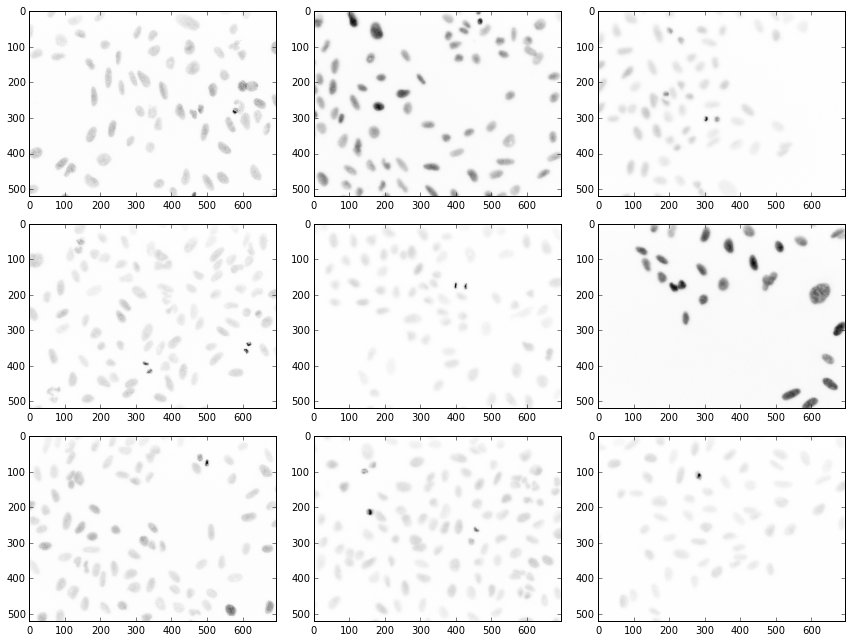

type is: <class 'numpy.ndarray'>


In [7]:
#answer
fig, plots = plt.subplots(figsize=(12, 9), nrows=3, ncols=3)

images = []
for i, file in enumerate(paths):
    images.append(imread(file))
    if i < 9:
        plots[i%3, int(i/3)].imshow(images[i][:,:], cmap=cm.Greys)

plt.tight_layout()
plt.show()

In [ ]:
# Write code to check some of the properties of the image(s) you loaded


Max of the image is 2214. Min of image is 140.
Shape of image is (520, 696). 

Max of the image is 3042. Min of image is 141.
Shape of image is (520, 696). 

Max of the image is 2507. Min of image is 140.
Shape of image is (520, 696). 

243.566517462
267.083482538
253.812160146
236.998590849
236.096278183
279.794559571
235.593006742
195.093296861
234.236480438
303.364572281


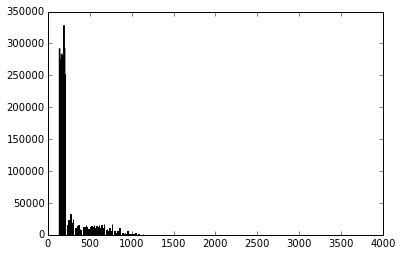

In [8]:
#answer
# Get shape and max and min of intensities
for image in images[:3]:
    print('Max of the image is {0}. Min of image is {1}.'.format(image.max(), image.min()) )
    print('Shape of image is {0}. \n'.format(image.shape) )
    
# Ger histogram of intensities
values = []
for image in images:
    values.append(np.reshape(image, -1))    
    print(values[-1].mean())
    
plt.hist(values, bins = 40)
plt.show()

In [ ]:
# Write some code to focus on the important parts of the histogram of intensities


10


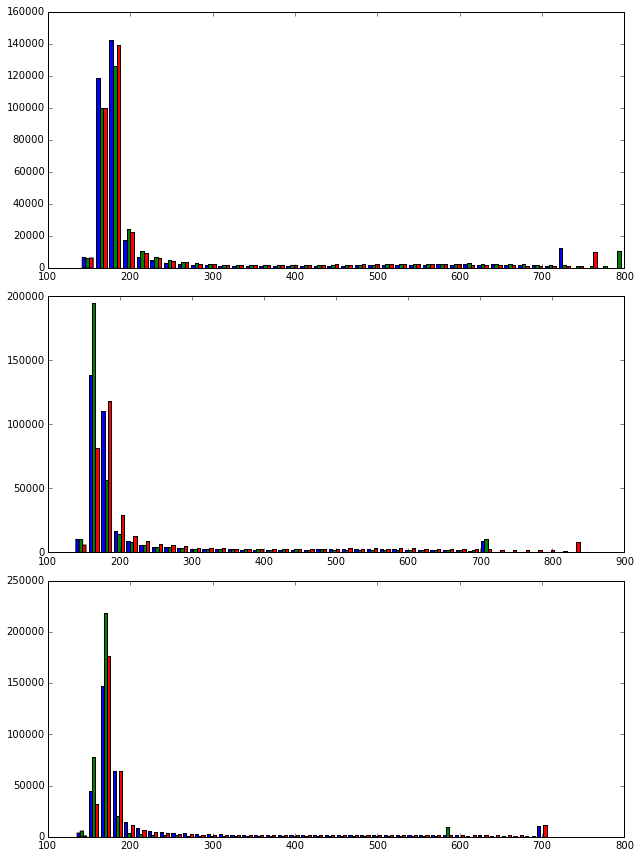

In [9]:
#answer
# Remove values greater than 3 times the mean

for i, value in enumerate(values):
    mean = value.mean()
    values[i] = [x if x<= 3*mean else 3*mean for x in value ]


print(len(values))
fig, plots = plt.subplots(figsize=(9, 12), nrows=3, ncols=1)
k = 0
for i in range(0, len(values)-1, 3):
    plots[k].hist(values[i:i+3], bins = 40)
    k += 1

plt.tight_layout()
plt.show()


We need to think about what is `background` and what is `foreground`. A possible solution is to define a threshold and set all values below (background) to zero and all above (foreground) equal to 1...

In [ ]:
# Write code here to explore use of thresholds to differenciate background from foreground

In [23]:
#answer
factor = 15.0

masks = []
for i, image in enumerate(images):
    for_peak = np.array( [x for x in values[i] if x< 230] )
    mean = for_peak.mean()
    st_dev = np.std(for_peak)
    masks.append([])
    for j in range(len(image)):
        masks[-1].append([])
        for l in range(len(image[j])):
            if images[i][j][l] < mean + factor * st_dev:
                masks[-1][-1].append(0)
            else:
                masks[-1][-1].append(1000)

masks = np.array(masks)


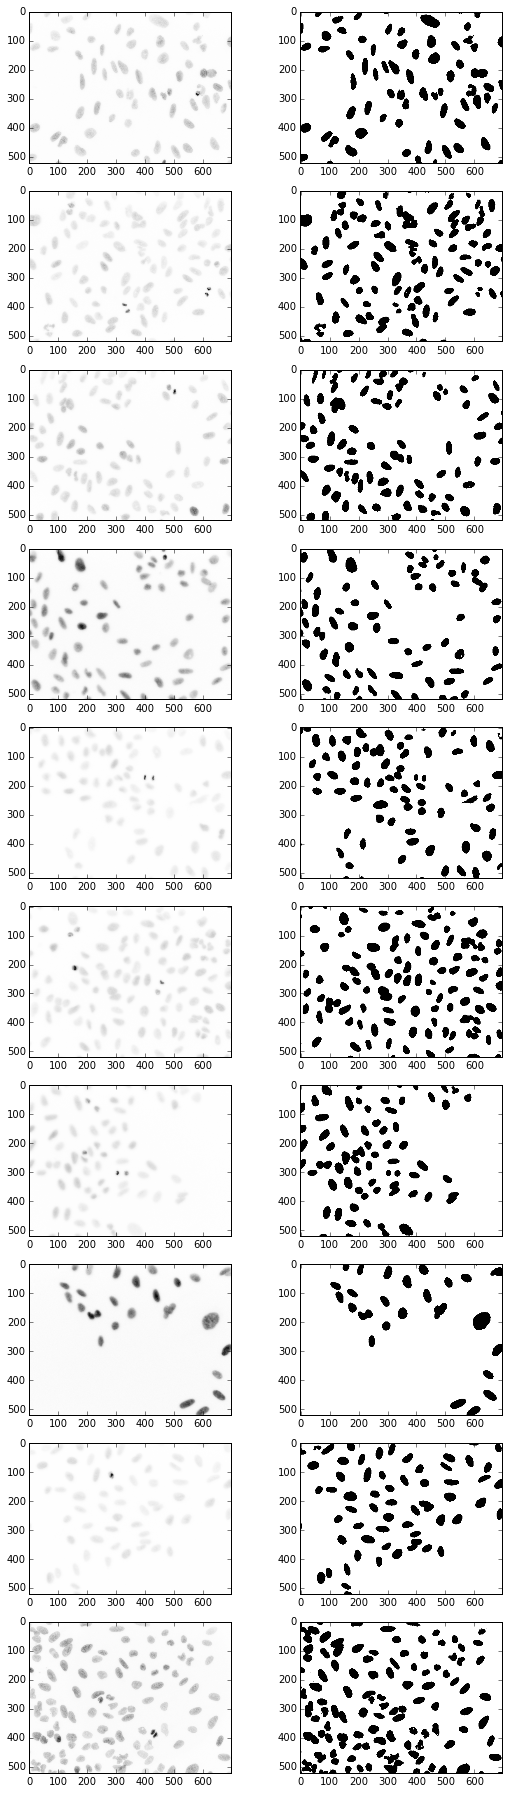

In [24]:
fig, plots = plt.subplots(figsize=(8, 25), nrows=10, ncols=2)

for i in range(10):
    plots[i][0].imshow(images[i], cmap=cm.Greys)
    plots[i][1].imshow(masks[i][:,:], cmap=cm.Greys)
    
plt.tight_layout()
plt.show()

Because of the close proximity of the cells in some regions, likely there is no threshold single threshold that neatly separates all the cells. But, maybe you already have a good enough threshold that appears to separate most of the cells.  Then what you need to do it actually identify/mark the individual cells.  

## Creating a validation image

The best way to test your code is to create a (set of) image(s) that countain "cells" created by you.  You would specify distributions in intensities for foreground, background, position of center of cells, and shape of cells. At first, it might be best to generate validation sets that are relatively easy!

What is easy? backgroung is 0, foreground is 1000, cells are circles and there are only a handful of cells in the image.

In [ ]:
# write your code for generating validation images here

def create_validation_image(number_cells = 1, cell_radius = 5, Lx = 100, Ly = 100, 
                            mean_backgd = 0, stdev_bacgdk = 0, mean_foregd = 1000, stdev_foregd = 0):
    """
    """
    
    return image, cell_centers

[(11, 87), (93, 3), (34, 15), (95, 22), (7, 3)]


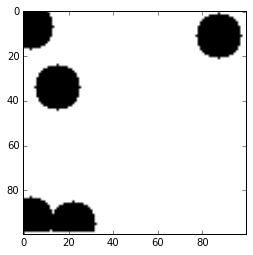

In [199]:
#answer
def create_validation_image(number_cells = 1, cell_radius = 5, Lx = 100, Ly = 100, 
                            mean_backgd = 0, stdev_bacgdk = 0, mean_foregd = 1000, stdev_foregd = 0):
    """
    """
    image = np.zeros((Lx, Ly), dtype = int)
    cell_centers = []
    
    for i in range(number_cells):
        # Select position of center of cell  
        x = randint(0, Lx-1)
        y = randint(0, Ly-1)
        cell_centers.append((x, y))
        # Fill in circle with radius cell_radius
        for xl in range(max(0, x-cell_radius), min(Lx-1, x+cell_radius+1)):
            for yl in range(max(0, y-cell_radius), min(Ly-1, y+cell_radius+1)):
                dist_squared = (x - xl)**2 + (y - yl)**2
                if dist_squared <= cell_radius**2:
                    image[xl][yl] = mean_foregd
            
    # Add noise
    if stdev_bacgdk != 0 or stdev_foregd != 0:
        for x in range(Lx):
            for y in range(Ly):
                if image[x][y] == 0:
                    image[x][y] = norm.rvs(size = 1, loc = mean_backgd, scale = stdev_bacgdk)[0]
                else:
                    image[x][y] = norm.rvs(size = 1, loc = mean_foregd, scale = stdev_foregd)[0]
            
    return image, cell_centers

image, cell_centers = create_validation_image(5, 10, mean_backgd = 300, stdev_bacgdk = 100, stdev_foregd = 100)
image, cell_centers = create_validation_image(5, 10)
print(cell_centers)
plt.imshow(image, cmap=cm.Greys)
plt.show()

Now you can use the easy images you created to develop your code for detecting cells

In [ ]:
# write your code here
# We are going to assign different labels to each cluster of foreground pixels.
# But which pixels can potentially belong to the same cluster? I suggest using the eight 
# pixels around each center pixel.


def get_neighbors(x, y, Lx, Ly):
    """
    Takes coordinates x and y and returns list of tuples with coordinates of 8 neighbors of (x,y)
    
    input:
        x - int
        y - int
        Lx - int
        Ly - int
        
    output:
        neighbors - list of tuples
    """

    return neighbors


cells = {}


In [124]:
#answer

def get_neighbors(x, y, Lx, Ly):
    """
    Takes coordinates x and y and returns list of tuples with coordinates of 8 neighbors of (x,y)
    
    input:
        x - int
        y - int
        Lx - int
        Ly - int
        
    output:
        neighbors - list of tuples
    """
    neighbors = []
    # North
    xn = x
    yn = (y+1) % Ly
    neighbors.append((xn, yn))
    # Northeast
    xn = (x+1) % Lx
    yn = (y+1) % Ly
    neighbors.append((xn, yn))
    #East
    xn = (x+1) % Lx
    yn = y
    neighbors.append((xn, yn))
    #Southeast
    xn = (x+1) % Lx
    yn = (y-1) % Ly
    neighbors.append((xn, yn))
    #South
    xn = x
    yn = (y-1) % Ly
    neighbors.append((xn, yn))
    #Southwest
    xn = (x-1) % Lx
    yn = (y-1) % Ly
    neighbors.append((xn, yn))
    #West
    xn = (x-1) % Lx
    yn = y
    neighbors.append((xn, yn))
    #Northwest
    xn = (x-1) % Lx
    yn = (y+1) % Ly
    neighbors.append((xn, yn))
    
    return neighbors

#print(get_neighbors(0, 99, 100, 100))

450
550
650
750


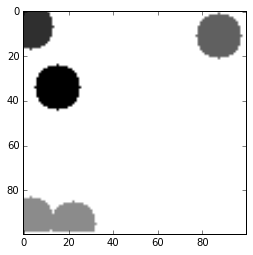

In [200]:
#answer
# Right now, all foreground pixels are labelled with `1000`. 
# We are going to assign different labels to each cluster of foreground pixels.
# But which pixels belong to the same cluster? I suggest using the eight 
# pixels around each center pixel.

cells = {}

# We will start by picking a pixel at random, check if it does not belong to a cluster 
# and then do a breadth search first.

Lx, Ly = image.shape
#print(Lx, Ly)

label = 350
failure = 0

while True:
    x = randint(0, Lx-1)
    y = randint(0, Ly-1)
    
    # Check if random pixel belongs to un-identified cell
    if image[x][y] != 1000:
        failure += 1
    else:
        failure = 0
        image[x][y] = label
        seeds = {(x,y), }
        cells[label] = [(x, y)]

        # Perform breath first search for pixels belonging to cell 
        while seeds:
            x0, y0 = seeds.pop()
            neighbors = get_neighbors(x0, y0, Lx, Ly)
            for xn, yn in neighbors:
                if image[xn][yn] == 1000:
                    image[xn][yn] = label
                    cells[label].append((xn, yn))
                    seeds.add((xn, yn))
                elif image[xn][yn] == 0:
                    continue
        # I need to store information on cell (center of mass, area, and so on)
                    
        label += 100
        print(label)
        
    if failure > Lx*Ly:
            break

#plt.imshow(image[x-10:x+10,y-10:y+10], cmap=cm.Greys)
plt.imshow(image, cmap=cm.Greys)
plt.show()

If you set things up the same way as I, cells is a dictionary with cell labels as key and values that are a list of tuples with the coordinates of the pixels belonging to the cells.

To calculate the area of a cell, we just need to count the number of pixels in each list.

Retrieving the center of mass coordinates is also straightforward. 

In [206]:
print(cell_centers)
print()
print(cells.keys())
for label in cells.keys():
    print(label, len(cells[label]), get_center_of_mass(cells[label]))
    

[(11, 87), (93, 3), (34, 15), (95, 22), (7, 3)]

dict_keys([450, 550, 350, 650])
450 317 (11.0, 87.0)
550 207 (7.782608695652174, 5.628019323671498)
350 408 (91.96078431372548, 14.683823529411764)
650 317 (34.0, 15.0)


In [ ]:
# Write your code here

def get_center_of_mass(pixels):
    """
    """
    
    return xcm, ycm

In [204]:
#answer

def get_center_of_mass(pixels):
    """
    """
    xcm = 0
    ycm = 0
    for x, y in pixels:
        xcm += x
        ycm += y
        
    xcm = xcm / len(pixels)
    ycm = ycm / len(pixels)
    
    return xcm, ycm

get_center_of_mass(cells[650])

(34.0, 15.0)